# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

Clarification on Q1,
You are allowed to use libraries (sklearn , scipy) to calculate the silhoutte_scores , KMeans and plot the dendogram. Elbow method needs to be done from scratch.
Since the dataset was huge , you will now only use the test split of the fashion mnist dataset (10k samples). The same has been updated in the Assignment zip (please re-download)
For the visualization of clusters you are expected to use PCA to reduce dimensions and then plot scatterplots. For the coloring you are allowed to use any method (eg. T-SNE) it should just show all the points colored according to their cluster.

The current dataset split is small and does not take time to run the scores with or without using libraries.


**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found. Implement this method on your own.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found. You can use the functions provided by sklearn.metrics.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)]. (init parameter in KMeans class) 


1c) Visualize the dataset to depict the clusters formed. Here you can leverage methods like PCA to reduce the data to 2-3 dimensions and visualize using scatter plots. Color the points according to the clusters (you can use T-SNE or any other matplotlib method)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

## Part1: K Means

In [ ]:
# LOADING THE DATASET. Take only the test split (10000 samples)
from keras.datasets import fashion_mnist
import numpy as np
from sklearn import preprocessing

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(X_train.shape[0] , -1)
X_test = X_test.reshape(X_test.shape[0] , -1)
y_train = np.copy(y_train)
y_test = np.copy(y_test)

X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X = X_test.reshape(X_test.shape[0] , -1)
y = np.copy(y_test)
print("10K images flattened: " , X.shape , " and 10k labels: " , y.shape)


4422102/4422102 [==============================] - 0s 0us/step
(60000, 784)
(60000,)
(10000, 784)
(10000,)
10K images flattened:  (10000, 784)  and 10k labels:  (10000,)


In [ ]:
print(type(X_train))
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)
print(X)
print(y)
print(type(X))
print(type(y))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[9 0 0 ... 3 0 5]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[9 2 1 ... 8 1 5]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[9 2 1 ... 8 1 5]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


***Visualize the results from elbow method and silhoutte method. (Vary the value of k from around 2-3 to 20)***

In [ ]:
#implement elbow method from scratch
def elbow(X):
  from sklearn.cluster import KMeans
  wcss = [] # within cluster sum of squares

  K = range(5, 20)
  for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++').fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

  print(list(K))
  print(wcss)

  plt.plot(K, wcss, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('WCSS')
  plt.title('The Elbow Method using WCSS')
  plt.show()

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[2428.1150387006337, 2332.8692007783784, 2247.084632700812, 2191.426246398427, 2132.855168079069, 2091.3694074886357, 2045.4243935497946, 2006.7169232175684, 1977.9081922535395, 1956.5353200243203, 1934.5683964384289, 1912.694849945647, 1896.668498490474, 1879.2107442452934, 1861.4842873336302]


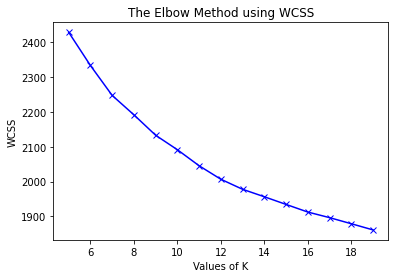

In [ ]:
# X_train is really huge, so doing it in X_test
elbow(X_test)

***10 Clusters Identified as per Elbow Method***

In [ ]:
#implement silhouette method from scratch
def silhouette(X):
  from sklearn.cluster import KMeans
  SK = range(5,20)
  sil_score = []
  for i in SK:
    labels = KMeans(n_clusters=i, random_state=0).fit(X).labels_
    score = metrics.silhouette_score(X, labels, metric="euclidean", random_state=0)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = " + str(i) + " is " 
            + str(score))

  print(list(SK))
  print(sil_score)

  plt.plot(SK, sil_score, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Silhouette score')
  plt.title('The Elbow Method using Silhouette score')
  plt.show()


Silhouette score for k(clusters) = 5 is 0.15055698388803512
Silhouette score for k(clusters) = 6 is 0.1456576125640778
Silhouette score for k(clusters) = 7 is 0.15076919391592147
Silhouette score for k(clusters) = 8 is 0.14508431372737127
Silhouette score for k(clusters) = 9 is 0.147961386756157
Silhouette score for k(clusters) = 10 is 0.1439240680731716
Silhouette score for k(clusters) = 11 is 0.1391344925805727
Silhouette score for k(clusters) = 12 is 0.11839486022176475
Silhouette score for k(clusters) = 13 is 0.1145485824452876
Silhouette score for k(clusters) = 14 is 0.11217619013002113
Silhouette score for k(clusters) = 15 is 0.11295398503765428
Silhouette score for k(clusters) = 16 is 0.11006069809101084
Silhouette score for k(clusters) = 17 is 0.10827182219940296
Silhouette score for k(clusters) = 18 is 0.09379602584679748
Silhouette score for k(clusters) = 19 is 0.09510968582370413
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.15055698388803512, 0.1456576125640778

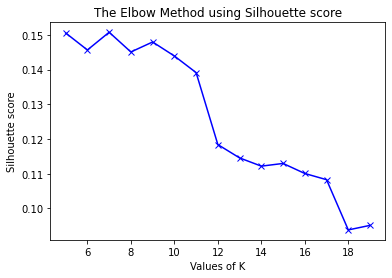

In [ ]:
# X_train is really huge, so doing it in X_test
silhouette(X_test)

***Max Silhouette Score at k = 7, Hence 7 Clusters is the right option***

In [ ]:
# Visualize the clusters formed by Kmeans (Use PCA to reduce dimensions and plot scatter plot. You can show the original ground truth labels in one plot and then the predicted clusters in another plot)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_test_pca = pca.fit_transform(X_test)
print(X_test_pca)

[[ 0.53657023 -0.02128024  0.21638947]
 [-0.0533383   0.2923889  -0.13473318]
 [-0.40217552 -0.32469262  0.05602778]
 ...
 [-0.18794918 -0.02335359  0.2234605 ]
 [-0.36447134 -0.38655302  0.11788937]
 [ 0.45953757 -0.07334003 -0.06078276]]


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


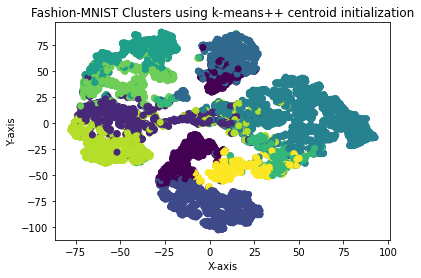

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

kmeans_cl = KMeans(n_clusters = 10, init="k-means++", random_state=0)
labels = kmeans_cl.fit_predict(X_test)

tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_test_pca_tsne = tsne.fit_transform(X_test_pca)

tsne_2d_one = X_test_pca_tsne[:,0]
tsne_2d_two = X_test_pca_tsne[:,1]

plt.scatter(tsne_2d_one, tsne_2d_two, c=labels)
plt.title('Fashion-MNIST Clusters using k-means++ centroid initialization')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


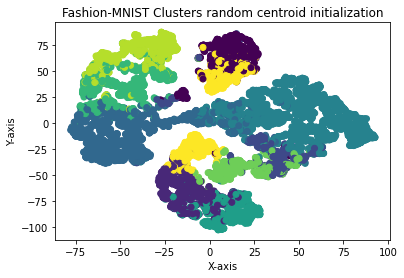

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

kmeans_cl = KMeans(n_clusters = 10, init="random", random_state=0)
labels = kmeans_cl.fit_predict(X_test)

tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_test_pca_tsne = tsne.fit_transform(X_test_pca)

tsne_2d_one = X_test_pca_tsne[:,0]
tsne_2d_two = X_test_pca_tsne[:,1]

plt.scatter(tsne_2d_one, tsne_2d_two, c=labels)
plt.title('Fashion-MNIST Clusters random centroid initialization')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


## Part2: Hierarchical clustering

In [ ]:
# implement hierarchical clustering ( you can use scikit module)
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

def plot_scatter_plot(X):
  pca = PCA(n_components=2)
  X_pca = pca.fit_transform(X)

  X_pca_2d_one = X_pca[:,0]
  X_pca_2d_two = X_pca[:,1]

  plt.scatter(X_pca_2d_one, X_pca_2d_two, c=labels, cmap='viridis')
  plt.show()

def hierarchical_clustering(X):
  hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
  labels = hierarchical_cluster.fit_predict(X) 
  plot_scatter_plot(X)


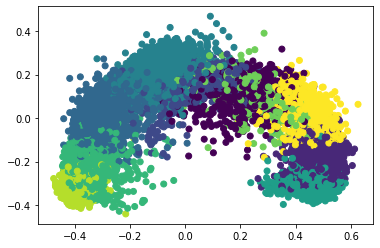

In [ ]:
# since, X_train is huge, doing with X_test
hierarchical_clustering(X_test)

In [ ]:
#visualize a dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

def dendogram(X):
  linkage_data = linkage(X, method='ward', metric='euclidean')
  plt.figure(figsize=(12, 6))
  dendrogram(linkage_data)
  plt.title('Hierarchical Clustering Dendrogram on Fashion-MNIST data')
  plt.xlabel("Number of points in node (or index of point if no parenthesis).")
  plt.ylabel('Distance')
  plt.show()
  

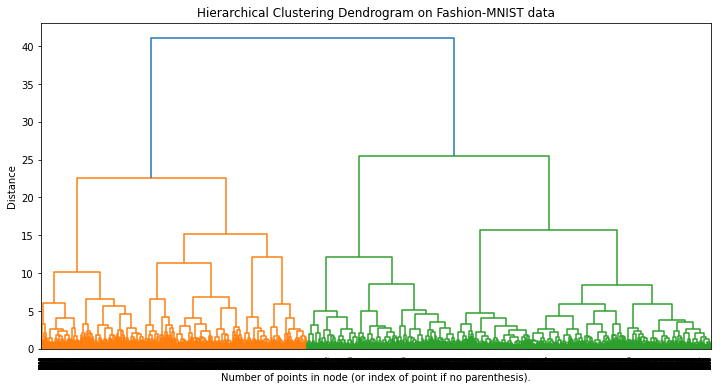

In [ ]:
dendogram(X_test)

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

**Answer:** Finding optimal number of clusters in a dendrogram is the same as finding the largest horizontal space that doesn't have any vertical lines (the space with the longest vertical lines). </br>
This means that there's more separation between the clusters. </br>
We can draw a horizontal line that passes through that longest distance.</br>
 After locating the horizontal line, we count how many times our vertical lines were crossed by it<br>


In this example, I can draw the horizontal line where there are 3 orage histograms and 2 green histograms. The horizontal line will touch 10 vertical lines. So, optimal number of clusters = 10</br>
</br>
</br>





In [ ]:
#visualisation of clusters using single linkage and complete linkage
from sklearn.cluster import AgglomerativeClustering

single_linakge_clustering = AgglomerativeClustering(n_clusters=10, linkage='single')
single_linakge_clustering.fit(X_test)
print(single_linakge_clustering.labels_)


[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.cluster import AgglomerativeClustering

complete_linakge_clustering = AgglomerativeClustering(n_clusters=10, linkage='complete')
complete_linakge_clustering.fit(X_test)
print(complete_linakge_clustering.labels_)


[2 3 0 ... 6 0 4]


In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=31)
X_test_tsne = tsne.fit_transform(X_test)

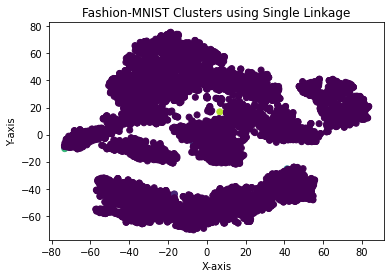

In [ ]:
tsne_2d_one = X_test_tsne[:,0]
tsne_2d_two = X_test_tsne[:,1]

plt.scatter(tsne_2d_one, tsne_2d_two, c=single_linakge_clustering.labels_)
plt.title('Fashion-MNIST Clusters using Single Linkage')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

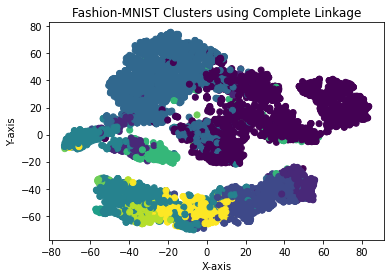

In [ ]:
tsne_2d_one = X_test_tsne[:,0]
tsne_2d_two = X_test_tsne[:,1]

plt.scatter(tsne_2d_one, tsne_2d_two, c=complete_linakge_clustering.labels_)
plt.title('Fashion-MNIST Clusters using Complete Linkage')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

**Question:** Mention the differences observed using single and complete linkage:

**Answer:** In **Single Linkage**, the distance between two clusters is the minimum distance between members of the two clusters. </br>
In **Complete Linkage**, the distance between two clusters is the maximum distance between members of the two clusters. </br>
Both of them will give different results. </br>

In this Fashion-Mnist dataset, if clustering is performed using simple linake technique, then the clusters formed are much more broadened in nature since Clusters that are close together are more likely to be merged by single linkage technique.  </br>
When we are using complete linkage technique, the resulting clusters are more prominent, well separated and close packed. That's why, we can see more distinct clusters. </br>

When the dataset consists of noise, outliers, then single linkage clustering is quite useful whereas cmplete linkage clustering is more useful when the dataset is well defined.</br>

In this dataset, complete linkage clustering is doing better job according to me. 


## Part3: Image Compression

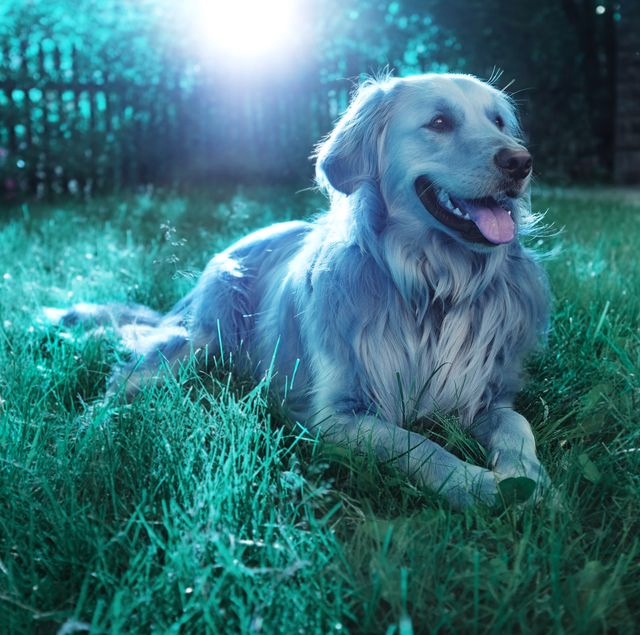

(635, 640, 3)
(406400, 3)


In [ ]:
import cv2 
from google.colab.patches import cv2_imshow

# Boiler plate code
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

print(img.shape)
print(X.shape)

[635, 640, 3]
Original Image Shape in bits: 29260800
Compressed Image Shape in bits: 4877184.0
Reduced by 83.33202099737534 %



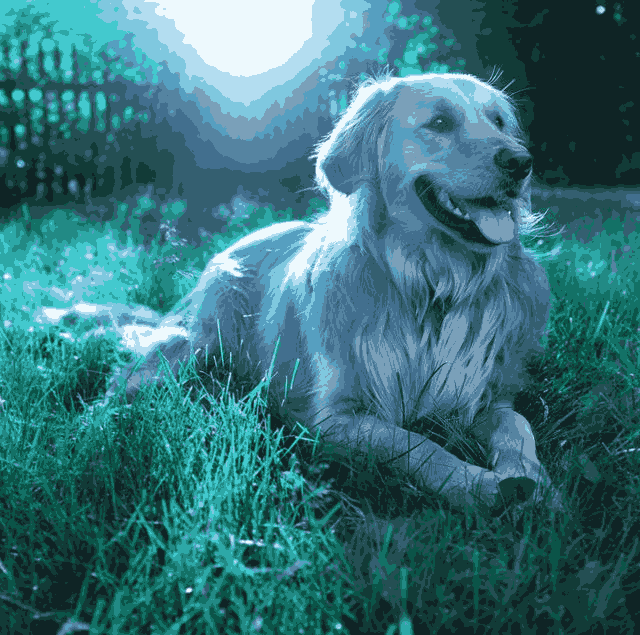

In [ ]:
from sklearn.cluster import KMeans

no_clusters = 16

kmeans = KMeans(n_clusters=no_clusters)
kmeans.fit(X)
compressed_image = kmeans.cluster_centers_[kmeans.labels_]

height =  img.shape[0]
width = img.shape[1]
channels = img.shape[2]

print([height, width, channels])
original_image_bits = 24*height*width*channels

no_of_bits = np.ceil(np.log2(no_clusters))

compressed_size_bits = (no_clusters * 24 + (height * width * channels * no_of_bits))

compressed_image = compressed_image.reshape((height, width, channels))

print("Original Image Shape in bits: ", end="")
print(original_image_bits)
print("Compressed Image Shape in bits: ", end="")
print(compressed_size_bits)

reduction = 100 * ((original_image_bits - compressed_size_bits) / original_image_bits)
print("Reduced by ", end="")
print(str(reduction) + " %")
print()

cv2_imshow(compressed_image)


[635, 640, 3]
Original Image Shape in bits: 29260800
Compressed Image Shape in bits: 3657792.0
Reduced by 87.499343832021 %



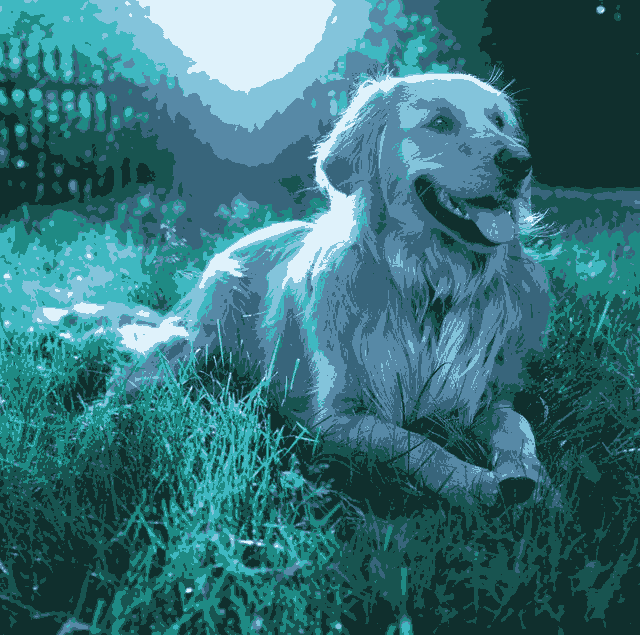

In [ ]:
from sklearn.cluster import KMeans

no_clusters = 8

kmeans = KMeans(n_clusters=no_clusters)
kmeans.fit(X)
compressed_image = kmeans.cluster_centers_[kmeans.labels_]

height =  img.shape[0]
width = img.shape[1]
channels = img.shape[2]

print([height, width, channels])
original_image_bits = 24*height*width*channels

no_of_bits = np.ceil(np.log2(no_clusters))

compressed_size_bits = (no_clusters * 24 + (height * width * channels * no_of_bits))

compressed_image = compressed_image.reshape((height, width, channels))

print("Original Image Shape in bits: ", end="")
print(original_image_bits)
print("Compressed Image Shape in bits: ", end="")
print(compressed_size_bits)

reduction = 100 * ((original_image_bits - compressed_size_bits) / original_image_bits)
print("Reduced by ", end="")
print(str(reduction) + " %")
print()

cv2_imshow(compressed_image)
